In [ ]:
from db_conn import query_from_db as sql_query
import pandas as pd

In [94]:
df =sql_query("""


SELECT c.CompanyName, 
       c.ActiveInvestors,
       d.VCRound,
       cbs.BusinessStatus,
       cii.PrimaryIndustrySector,
       chi.HQGlobalRegion
FROM (
    SELECT CompanyID, CompanyName, ActiveInvestors
    FROM Company
    WHERE YearFounded >= 2020
) as c
JOIN CompanyBusinessStatus cbs on cbs.CompanyID = c.CompanyID
JOIN CompanyIndustryInfo cii on cii.CompanyID = c.CompanyID
JOIN Deal d on d.CompanyID = c.CompanyID
JOIN CompanyHQinfo chi on chi.CompanyID = c.CompanyID
where d.VCRound !='' and  chi.HQGlobalRegion !='' """)

Connected to pitchbook_db database


Query Progress: 0 row [00:00, ? row/s]/Users/student/Documents/UNI/2023 Fall/Consultancy Project/EXAM 60%/PyNotebooks/db_conn.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chunk = pd.read_sql_query(chunk_query, connection)
Query Progress: 57087 row [09:33, 99.59 row/s] 

Query took 573.25 seconds
Connection closed


In [144]:
df.to_csv("Company_VCRounds_Geography_BusinessStatus_Industry_Active_Investors.csv",index=False)

In [124]:
groupped_df = df.groupby(['VCRound', 'HQGlobalRegion']).size().reset_index(name='Count')
groupped_df

,VCRound,HQGlobalRegion,Count
0,1st Round,Africa,641
1,1st Round,Americas,15615
2,1st Round,Asia,9867
3,1st Round,Europe,9371
4,1st Round,Middle East,1303
5,1st Round,Oceania,696
6,2nd Round,Africa,164
7,2nd Round,Americas,4848
8,2nd Round,Asia,3213
9,2nd Round,Europe,2580


/var/folders/qq/hbgm8vpn1j34zmys4f95ttgm0000gp/T/ipykernel_3581/3830607711.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(vcr_rounds)).colors  # Get colors as a list


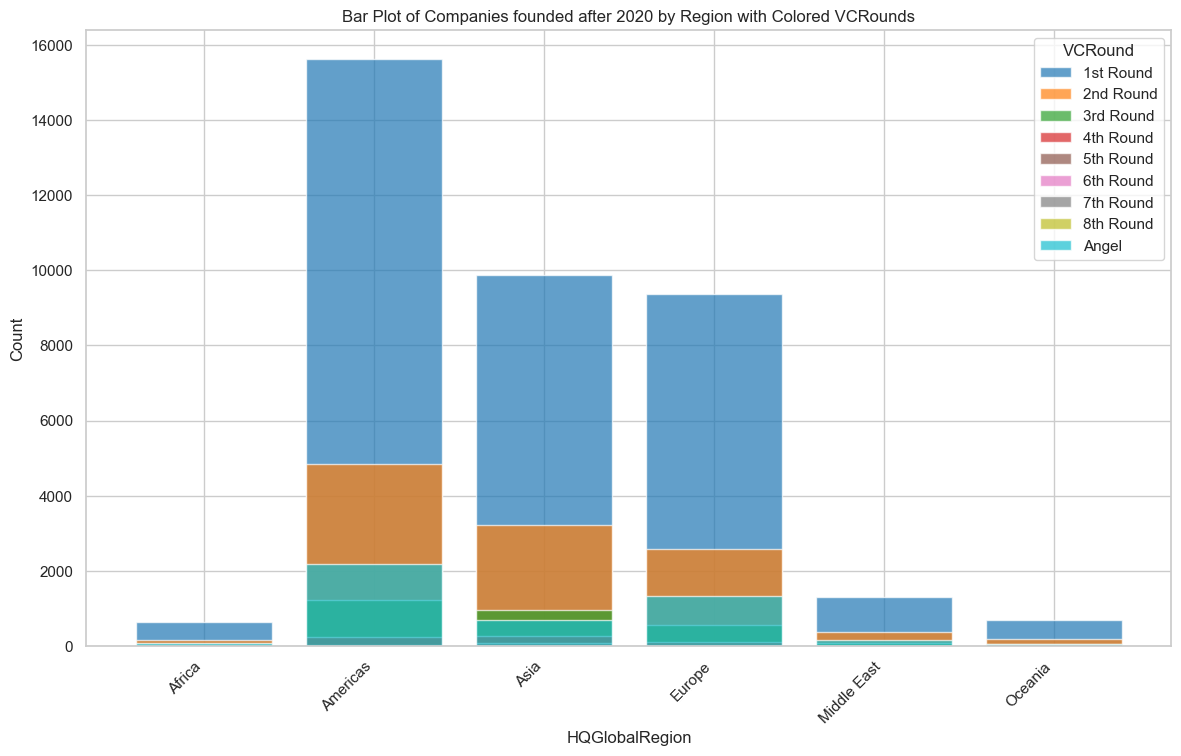

In [125]:
import matplotlib.pyplot as plt
# Get unique VCRounds and assign colors
import numpy as np

# Get the number of VCRounds and assign colors
vcr_rounds = groupped_df['VCRound'].unique()
colors = plt.cm.get_cmap('tab10', len(vcr_rounds)).colors  # Get colors as a list

fig, ax = plt.subplots(figsize=(14, 8))
# Plot bars
for i, (vcr, color) in enumerate(zip(vcr_rounds, colors)):
    subset = groupped_df[groupped_df['VCRound'] == vcr]
    ax.bar(subset['HQGlobalRegion'], subset['Count'], color=color, label=vcr, alpha=0.7)

ax.set_xlabel('HQGlobalRegion')
ax.set_ylabel('Count')
ax.set_title('Bar Plot of Companies founded after 2020 by Region with Colored VCRounds')

ax.legend(title='VCRound')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/qq/hbgm8vpn1j34zmys4f95ttgm0000gp/T/ipykernel_3581/936148406.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by='Count', inplace=True, ascending=False)


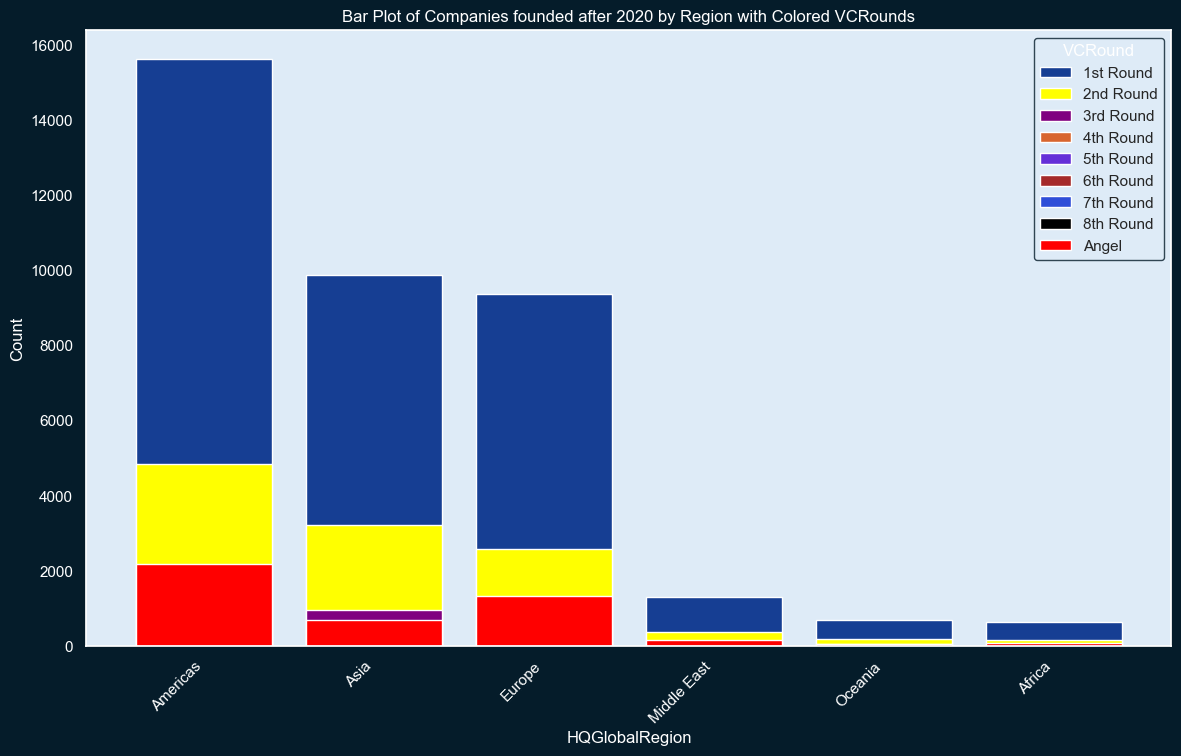

In [146]:
import matplotlib.pyplot as plt
#groupped_df.sort_values(by='Count', inplace=True)
# Get the number of VCRounds and assign colors manually
vcr_rounds = groupped_df['VCRound'].unique()
# Specify your desired colors for each VCRound
manual_colors = {
    'Angel': 'red',
    '1st Round': '#163E93',
    '2nd Round': 'yellow',
    '3rd Round': 'purple',
    '4th Round': '#d8652f',
    '5th Round': '#652fd8',
    '6th Round': 'brown',
    '7th Round': '#2f4ed8',
    '8th Round': 'black',
}  # Add more as needed

fig, ax = plt.subplots(figsize=(14, 8))

# Set colors for text, outer background, inner background, and axis
text_color = '#FFFFFF'
outer_background_color = '#051C2A'
inner_background_color = '#DEEBF7'
axis_color = '#FFFFFF'

fig.patch.set_facecolor(outer_background_color)
ax.set_facecolor(inner_background_color)
ax.tick_params(axis='both', colors=axis_color)
ax.spines['bottom'].set_color(axis_color)
ax.spines['top'].set_color(axis_color)
ax.spines['right'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)

# Plot bars
for i, vcr in enumerate(vcr_rounds):
    subset = groupped_df[groupped_df['VCRound'] == vcr]
    subset.sort_values(by='Count', inplace=True, ascending=False)
    
    color = manual_colors.get(vcr, 'gray')  # Use specified color or default to gray
    ax.bar(subset['HQGlobalRegion'], subset['Count'], color=color, label=vcr, alpha=1)

ax.set_xlabel('HQGlobalRegion', color=text_color)
ax.set_ylabel('Count', color=text_color)
ax.set_title('Bar Plot of Companies founded after 2020 by Region with Colored VCRounds', color=text_color)
ax.grid(False)
legend = ax.legend(title='VCRound', facecolor=inner_background_color, edgecolor=outer_background_color)
legend.get_title().set_color(text_color)

plt.xticks(rotation=45, ha='right', color=text_color)
plt.savefig('Geography_VCRound.svg', format='svg')
plt.show()
